In [1]:
# import libraries
import numpy as np
import pandas as pd

## 1. Use Pandas to Read the Dataset

### 1.1 movies.csv

In [2]:
movies = pd.read_csv('./Large/movies.csv',sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### 1.2 tags.csv

In [8]:
tags = pd.read_csv('./Large/tags.csv',sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### 1.3 ratings.csv

In [9]:
ratings = pd.read_csv('./Large/ratings.csv',sep=',',parse_dates=['timestamp'])
ratings.head()

C:\Users\zhang\AppData\Local\Temp\ipykernel_22788\3080500935.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings = pd.read_csv('./Large/ratings.csv',sep=',',parse_dates=['timestamp'])


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### 1.4 Remove timestamp column from ratings & tags

In [10]:
del ratings['timestamp']
del tags['timestamp']
ratings.head()
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


## 2. Data Structures

In [12]:
row_0 = tags.iloc[0]
print(type(row_0))
print(row_0)

<class 'pandas.core.series.Series'>
userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [13]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [15]:
row_0['userId']

np.int64(18)

In [16]:
'rating' in row_0

False

In [18]:
row_0.name

0

In [19]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

## 3. Descriptive Statistics

In [20]:
# Get summary statistics for ratings DataFrame
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [21]:
# Get the mode of the ratings DataFrame
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [22]:
# Get the correlation matrix for the ratings DataFrame
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [23]:
# Get the count of unique values in the 'rating' column
filter_2 = ratings.loc[ratings['rating'] > 0]

In [24]:
# Get the mean rating for each movieId
filter_2.groupby('movieId').mean()

,userId,rating
movieId,,
1,69282.396821,3.921240
2,69169.928202,3.211977
3,69072.079388,3.151040
4,69652.913280,2.861393
5,69113.475454,3.064592
...,...,...
131254,79570.000000,4.000000
131256,79570.000000,4.000000
131258,28906.000000,2.500000


## 4. Data Cleaning: Handling Missing Data

In [26]:
movies.shape

(27278, 3)

In [27]:
# Is movies containing any null
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [28]:
ratings.shape

(20000263, 3)

In [29]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [30]:
tags.shape

(465564, 3)

In [31]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [32]:
tags = tags.dropna()

In [33]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [34]:
tags.shape

(465548, 3)

## 5. Data Visualization

In [36]:
# import lib
import matplotlib.pylab as plt

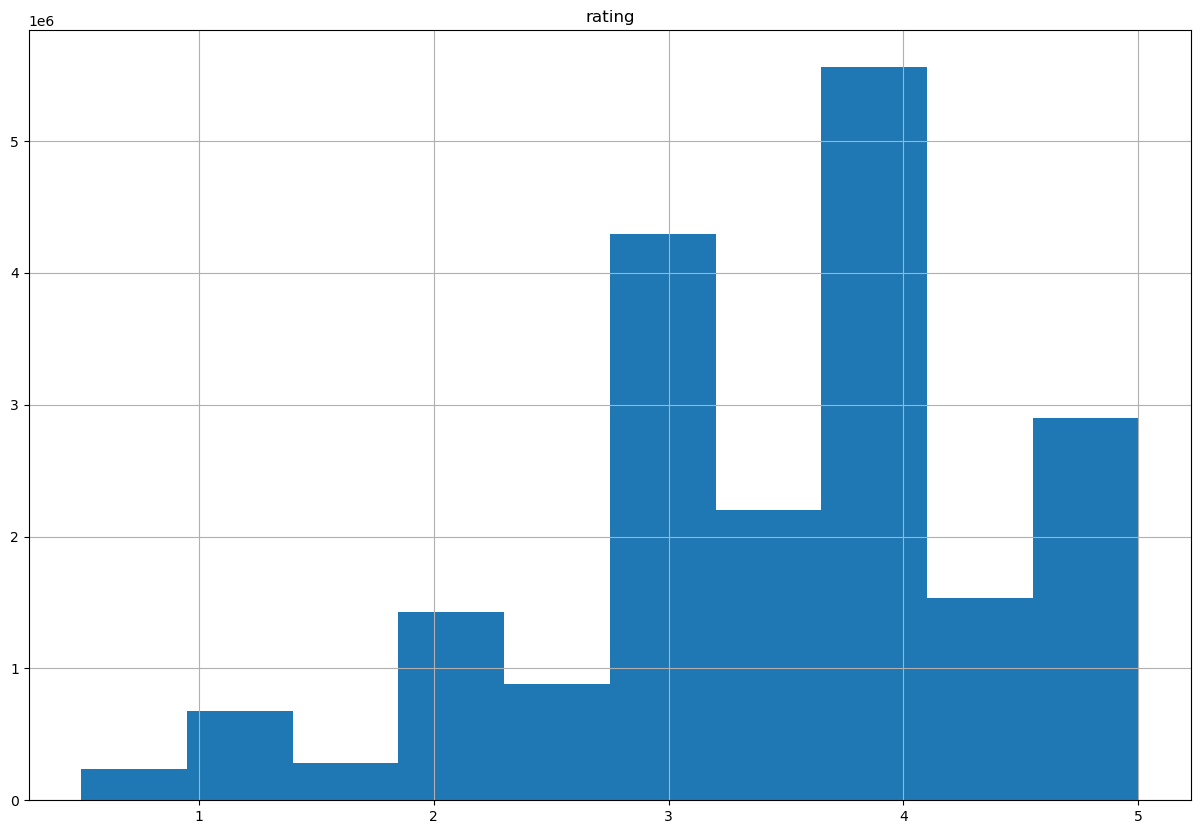

In [37]:
# histogram, rating, figsize, bins
ratings.hist(column='rating',figsize=(15,10),bins=10)
plt.show()

## 6. Getting information from columns

In [38]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [40]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [41]:
# get last 10
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [42]:
# get last
ratings.tail(10)

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


<Axes: xlabel='tag'>

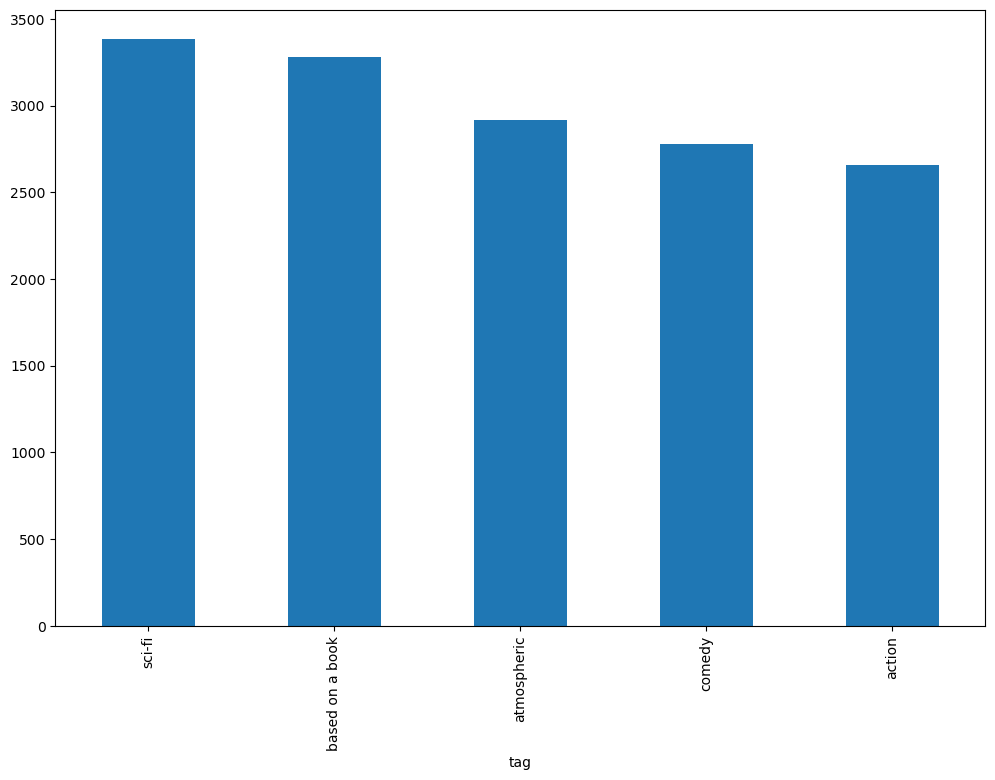

In [44]:
tag_counts = tags['tag'].value_counts()
tag_counts.head().plot(kind='bar',figsize=(12,8))

<Axes: xlabel='tag'>

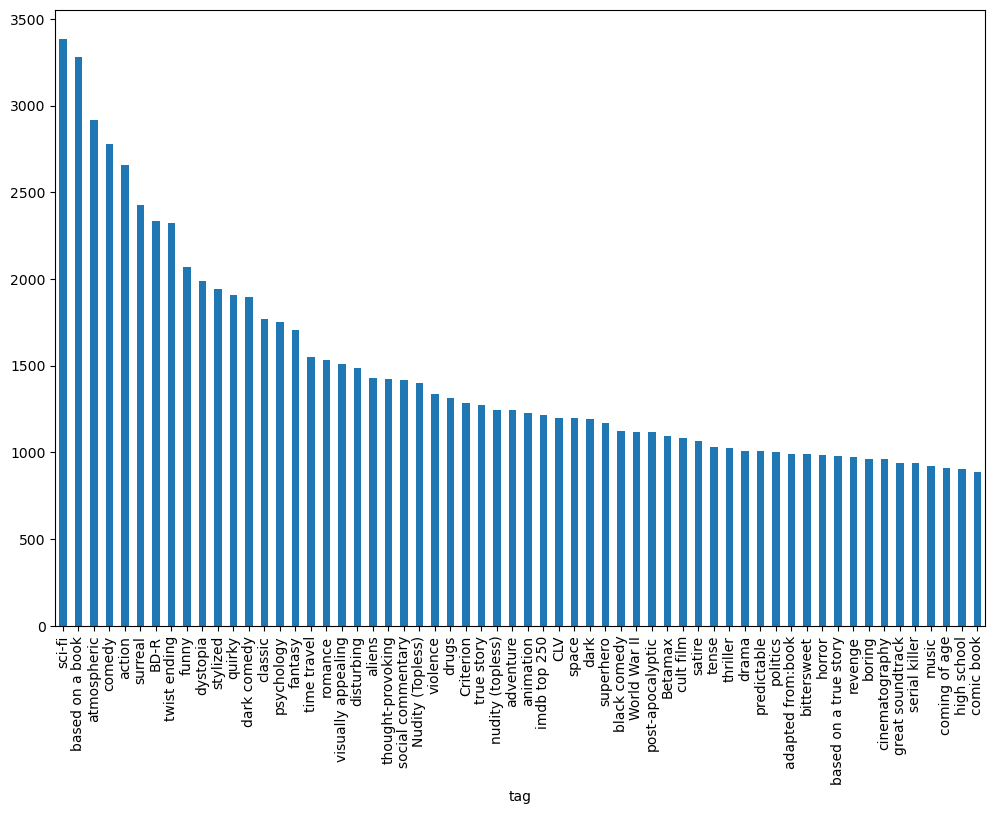

In [46]:
tag_counts.head(60).plot(kind='bar',figsize=(12,8))

<Axes: xlabel='tag'>

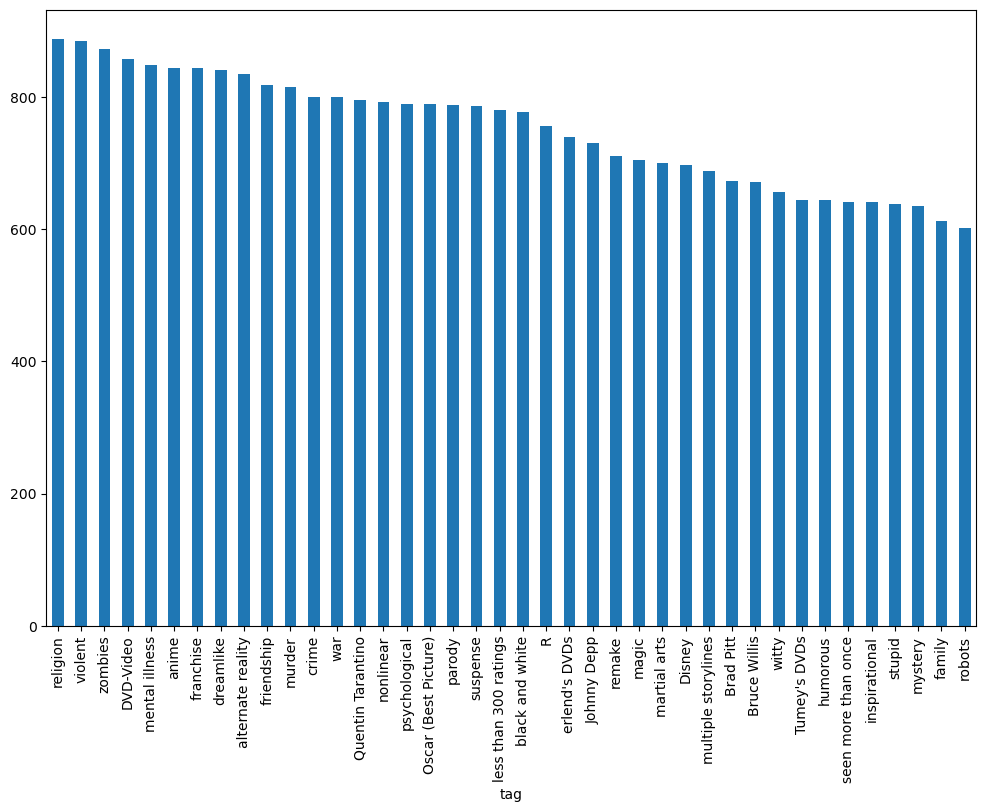

In [47]:
tag_counts[60:100].plot(kind='bar',figsize=(12,8))

## 7. Filters for Selecting Rows


In [48]:
is_highly_rated = ratings['rating'] >= 4.5
ratings[is_highly_rated].head()

,userId,movieId,rating
30,1,1196,4.5
31,1,1198,4.5
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0


In [50]:
is_animation = movies['genres'].str.contains('Animation')
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [55]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


## 8. Group By and Aggregate

In [56]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


### 8.1 Get the movies that are in average the best rated movies
#### 8.1.1 option1, using sort_values() function

In [57]:
sorted_average_rating = average_rating.sort_values(by='rating',ascending=False)
sorted_average_rating.head()

,rating
movieId,
95517,5.0
105846,5.0
89133,5.0
105187,5.0
105191,5.0


#### 8.1.2 option2, using loc + filter

In [58]:
highest_rating = average_rating.loc[average_rating['rating'] == 5.0]
highest_rating.head()

,rating
movieId,
26718,5.0
27914,5.0
32230,5.0
40404,5.0
54326,5.0


### 8.2 Combine movie name
#### 8.2.1 Get the movie indexes of the best rated movies

In [59]:
movie_ids = average_rating[average_rating['rating'] == 5.0].index
print(movie_ids)

Index([ 26718,  27914,  32230,  40404,  54326,  72235,  79866,  81117,  86055,
        88488,
       ...
       129516, 129526, 129530, 129741, 129905, 130347, 130351, 130644, 130996,
       131050],
      dtype='int64', name='movieId', length=113)


#### 8.2.2 Combine movie names using loc[] + isin()

In [60]:
movies.loc[movies['movieId'].isin(movie_ids)].head()

,movieId,title,genres
9007,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical
9561,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary
9862,32230,"Snow Queen, The (Lumikuningatar) (1986)",Children|Fantasy
10567,40404,Al otro lado (2004),Drama
12015,54326,"Sierra, La (2005)",Documentary


## 9. Merge Dataframes


In [61]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
df_merged = pd.merge(movies,tags,on='movieId',how='inner')
df_merged.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


## 10. Combine aggregation, merging, and filters to get useful analytics


In [64]:
avg_ratings = ratings.groupby('movieId',as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [65]:
box_office = pd.merge(movies,avg_ratings,on='movieId',how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [66]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated].head()

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534


In [67]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [68]:
box_office[is_comedy & is_highly_rated].head()

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.112359


## 11. Vectorized String Operations

In [69]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 11.1 Split 'genres' into multiple columns


In [70]:
movie_genres = movies['genres'].str.split('|',expand=True)
movie_genres.head(10)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


### 11.2 Add a new column for comedy genre flag


In [71]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres.head()

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


### 11.3 Extract year from title e.g. (1995)


In [75]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)',expand=True)

## 12. Parsing Timestamps

In [76]:
tags = pd.read_csv('./Large/tags.csv',sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

### 12.1 Unix time / POSIX time / epoch time records time in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970


In [77]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [79]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'],unit='s')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


### 12.2 Data Type datetime64[ns] maps to either M8[ns] depending on the hardware

In [80]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [81]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


### 12.3 Selecting rows based on timestamps

In [82]:
greater_than_time = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_time]
print(tags.shape,selected_rows.shape)

(465564, 5) (12130, 5)


### 12.4 Sorting the table using the timestamps


In [83]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


## 13. Average Movie Ratings over Time

In [92]:
average_rating = ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [93]:
movie_joined = pd.merge(movies,average_rating,on='movieId',how='inner')
movie_joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [94]:
movie_joined.corr()

ValueError: could not convert string to float: 'Toy Story (1995)'

In [95]:
yearly_average = movie_joined[['year','rating']].groupby('year',as_index=False).mean()
yearly_average.head()

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036


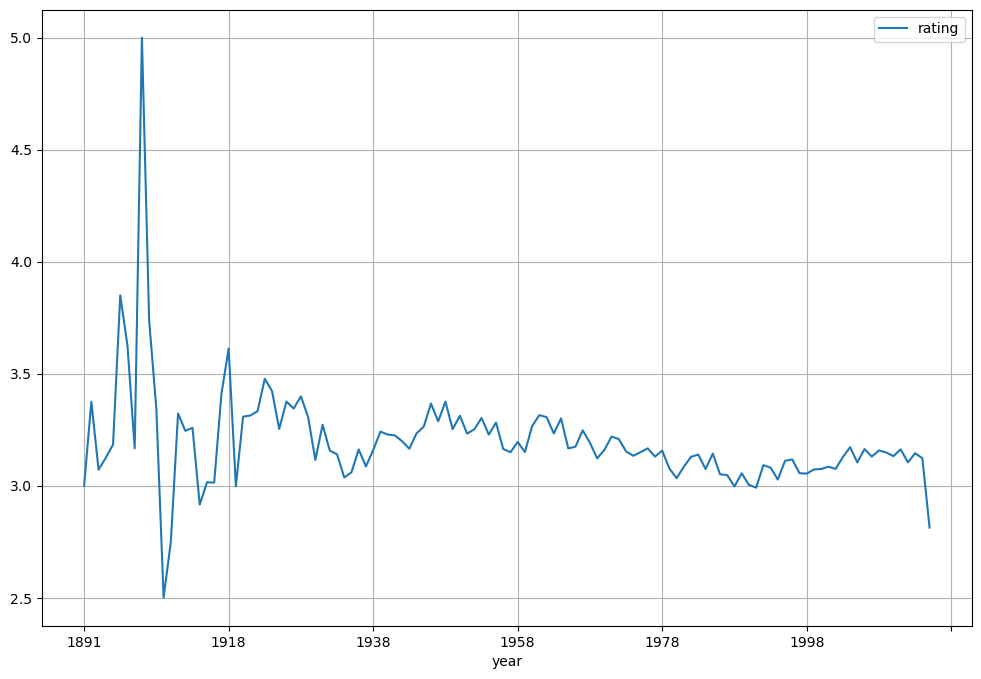

In [96]:
yearly_average.plot(x='year',y='rating',kind='line',figsize=(12,8),grid=True)
plt.show()